In [1]:
import pandas as pd
from sklearn import linear_model

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [5]:
print(df.isna().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
dummy_farn = pd.get_dummies(df.furnishingstatus).astype(int)
dummy_farn

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [7]:
my_df = df[["price","area","bedrooms","bathrooms","stories"]]
my_df

,price,area,bedrooms,bathrooms,stories
0,13300000,7420,4,2,3
1,12250000,8960,4,4,4
2,12250000,9960,3,2,2
3,12215000,7500,4,2,2
4,11410000,7420,4,1,2
...,...,...,...,...,...
540,1820000,3000,2,1,1
541,1767150,2400,3,1,1
542,1750000,3620,2,1,1
543,1750000,2910,3,1,1


In [8]:
final_df = pd.concat([my_df, dummy_farn], axis=1)
final_df

,price,area,bedrooms,bathrooms,stories,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0
1,12250000,8960,4,4,4,1,0,0
2,12250000,9960,3,2,2,0,1,0
3,12215000,7500,4,2,2,1,0,0
4,11410000,7420,4,1,2,1,0,0
...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,0,1
541,1767150,2400,3,1,1,0,1,0
542,1750000,3620,2,1,1,0,0,1
543,1750000,2910,3,1,1,1,0,0


In [9]:
final_df = final_df.drop(['semi-furnished'], axis = 1)

In [10]:
final_df.head()


,price,area,bedrooms,bathrooms,stories,furnished,unfurnished
0,13300000,7420,4,2,3,1,0
1,12250000,8960,4,4,4,1,0
2,12250000,9960,3,2,2,0,0
3,12215000,7500,4,2,2,1,0
4,11410000,7420,4,1,2,1,0


In [11]:
model = linear_model.LinearRegression()

In [12]:
model.fit(final_df[['area','bedrooms','bathrooms','stories','furnished', 'unfurnished']], final_df.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
model.predict(pd.DataFrame([{'area': 7420,
                            'bedrooms':4,
                           'bathrooms':2,
                           'stories': 3,
                           'furnished': 1,
                           'unfurnished': 0}]))

array([7547784.57434001])

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
new_df = pd.read_csv('house_price_prediction.csv')

In [15]:
new_df.head()

,price,area,bedrooms,bathrooms,stories,furnished,unfurnished
0,1157887,8270,4,2,2,1,0
1,341512,1860,1,2,3,0,1
2,650842,6390,1,1,1,1,0
3,852626,6191,2,2,1,1,0
4,615916,6734,1,3,2,0,1


In [16]:
corr_data= new_df.corr()

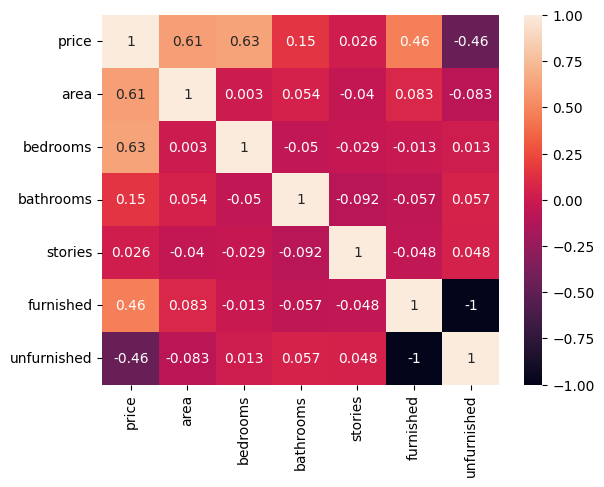

In [17]:
sns.heatmap(corr_data, annot=True)
plt.show()

In [18]:
new_model = linear_model.LinearRegression()

In [19]:
new_model.fit(new_df[['area','bedrooms','bathrooms','stories','furnished', 'unfurnished']], new_df.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
new_model.predict(pd.DataFrame([{'area': 6390,
                            'bedrooms':1,
                           'bathrooms':1,
                           'stories': 1,
                           'furnished': 1,
                           'unfurnished': 0}]))

array([693748.37230242])

In [22]:
df.furnishingstatus

0           furnished
1           furnished
2      semi-furnished
3           furnished
4           furnished
            ...      
540       unfurnished
541    semi-furnished
542       unfurnished
543         furnished
544       unfurnished
Name: furnishingstatus, Length: 545, dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
df2 = df

In [28]:
df2.furnishingstatus=le.fit_transform(df2.furnishingstatus)

In [30]:
df2.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,0
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,1
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,1
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,2
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,0
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,2
